In [1]:
import OneLoopLFVHD as lfvhd
from sympy import init_printing, symbols,lambdify
init_printing()

In [2]:
M0,M1,M2 = symbols('M_0,M_1,M_2',real=True)
C0 = lfvhd.C0(M0,M1,M2)
C0

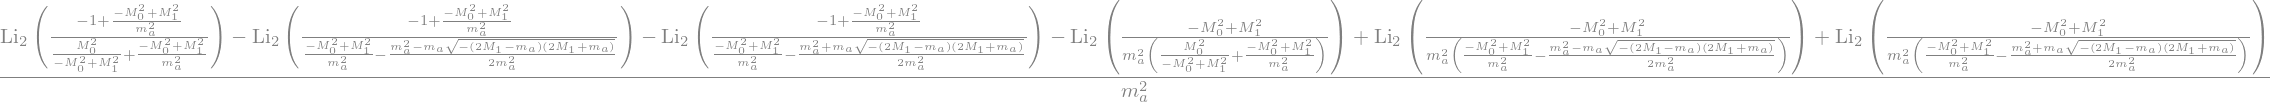

In [3]:
si = lfvhd.cambiosDivFin(M0,M1,M2)
ai = lfvhd.cambios_aprox(M0,M1,M2)
C0iM1_100 = C0.subs(si).subs(ai).subs(M2,M1)#.subs(M1,100).subs(lfvhd.ma,125).n()
C0iM1_100

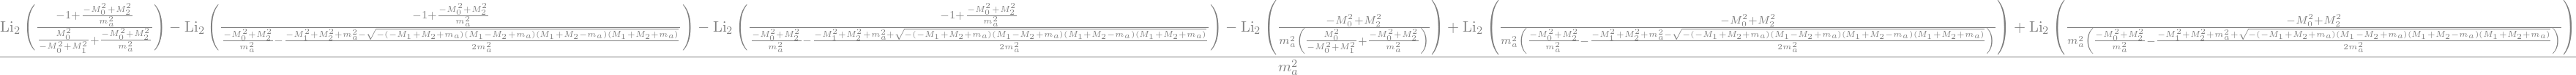

In [4]:
C0.subs(si).subs(ai)

In [5]:
import numpy as np
from scipy.special import spence
def sci_polylog(s,z):
    return spence(1-z)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
C0np = lambdify([M0,M1,M2],C0.subs(si).subs(ai).subs(lfvhd.ma,125.1),modules=['numpy',{'polylog':sci_polylog}])

<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in true_divide


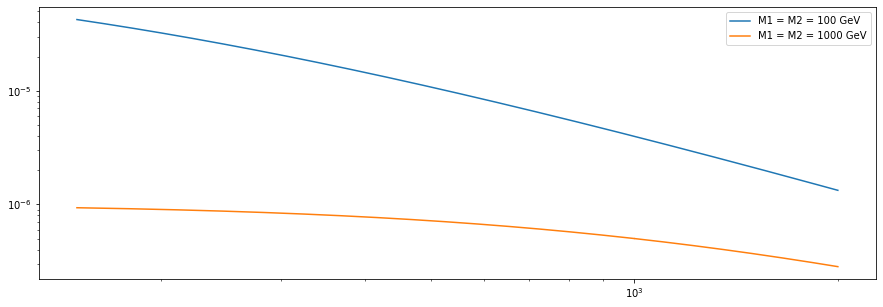

In [8]:
m0 = np.linspace(150,2000,1000)
Y100 = np.abs(C0np(m0,100+0*1j,100+0*1j + 1e-13))#*1e-5
Y1000 = np.abs(C0np(m0,1000+0*1j,1000+0*1j + 1e-13))#*1e-5
plt.figure(figsize=(15,5))
plt.loglog(m0,Y100,label='M1 = M2 = 100 GeV')
plt.loglog(m0,Y1000,label='M1 = M2 = 1000 GeV')
plt.legend()

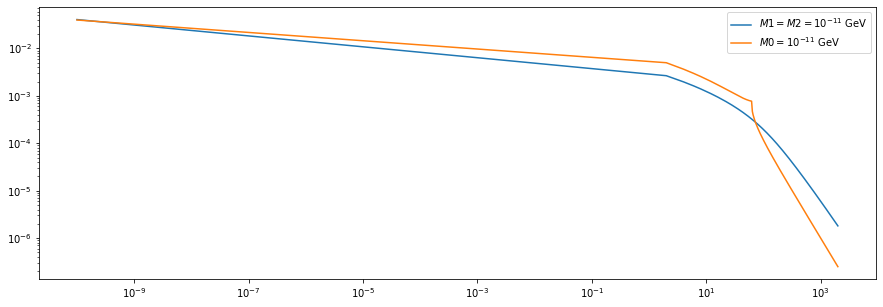

In [12]:
m0 = np.linspace(1e-10,2000,1000)+0*1j
mnu = 1e-11
Ynu0 = np.abs(C0np(m0,mnu+0*1j,mnu+0*1j+1e-20))#*1e-5
Ynu1 = np.abs(C0np(mnu+0*1j,m0,m0+1e-11))#*1e-5
plt.figure(figsize=(15,5))
plt.loglog(np.abs(m0),Ynu0,'-',label='$M1 = M2 = 10^{-11}$ GeV')
plt.loglog(np.abs(m0),Ynu1,'-',label='$M0 = 10^{-11}$ GeV')
#plt.xticks([80,1000,1920])
#plt.semilogy(m0,Y1000,label='M1 = M2 = 1000 GeV')
plt.legend()

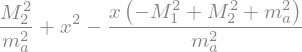

In [11]:
x = symbols('x')
ma = lfvhd.ma
f = x**2 - ((ma**2 - M1**2 + M2**2)/ma**2)*x + (M2**2)/ma**2
f

In [12]:
from sympy import solve

In [13]:
x1, x2 = solve(f,x)

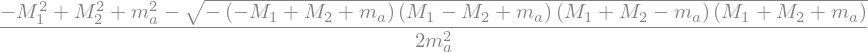

In [14]:
x1

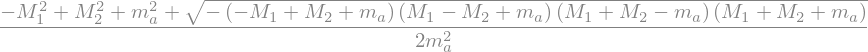

In [15]:
x2

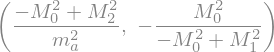

In [16]:
x0 = (M2**2 - M0**2)/ma**2
x3 = -M0**2/(M1**2 - M0**2)
x0,x3

In [17]:
R0 = lambda y0,yi: lfvhd.R0(x0,yi)

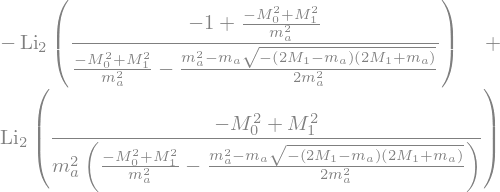

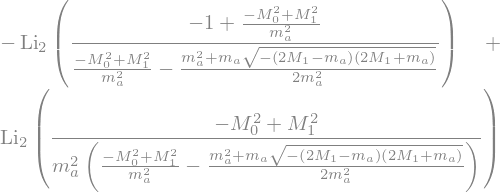

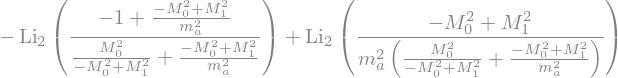

In [18]:
Rs = [R0(x0,x1),R0(x0,x2),R0(x0,x3)]
for r in Rs:
    display(r.subs(M2,M1))

In [20]:
C0exp = (R0(x0,x1)+ R0(x0,x2)-R0(x0,x3))/ma**2
#C0exp1 = (R0(lfvhd.x0(M0,M2),lfvhd.xk(1,M1,M2))+ R0(lfvhd.x0(M0,M2),lfvhd.xk(2,M1,M2))-R0(lfvhd.x0(M0,M2),x3(M0,M1)))/ma**2 
C0exp#-C0exp1#.subs(M2,M1)#.subs(lfvhd.ma,125.1)

TypeError: 'Mul' object is not callable

In [131]:
C0expnp = lambdify([M0,M1,M2],C0exp.subs(M2,M1).subs(lfvhd.ma,125.1),modules=['numpy',{'polylog':sci_polylog}])

<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in true_divide


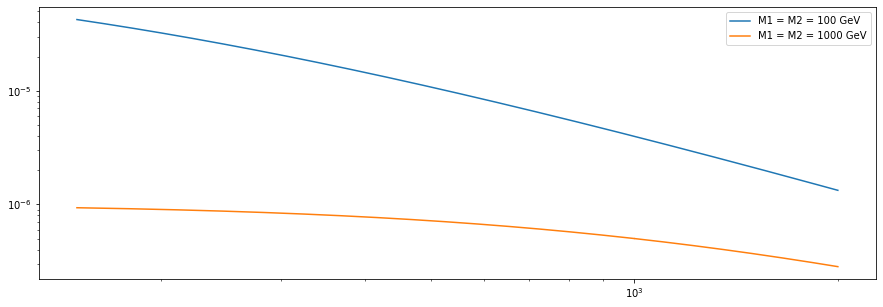

In [132]:
m0 = np.linspace(150,2000,1000)
Y100 = np.abs(C0expnp(m0,100+0*1j,100+0*1j + 1e-13))#*1e-5
Y1000 = np.abs(C0expnp(m0,1000+0*1j,1000+0*1j + 1e-13))#*1e-5
plt.figure(figsize=(15,5))
plt.loglog(m0,Y100,label='M1 = M2 = 100 GeV')
plt.loglog(m0,Y1000,label='M1 = M2 = 1000 GeV')
plt.legend()

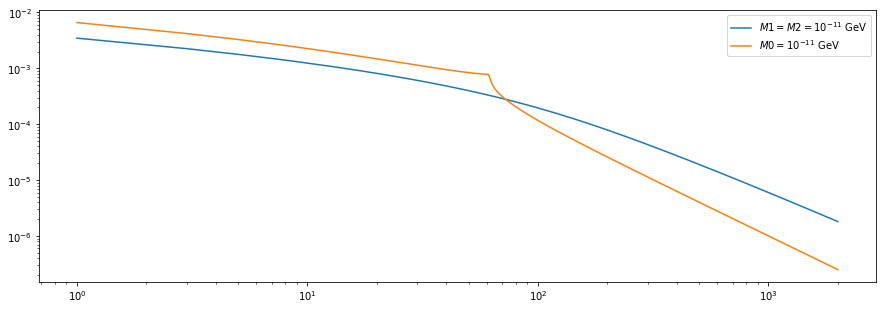

In [134]:
m0 = np.linspace(1,2000,1000)+0*1j
mnu = 1e-11
Ynu0 = np.abs(C0expnp(m0,mnu+0*1j,mnu+0*1j+1e-20))#*1e-5
Ynu1 = np.abs(C0expnp(mnu+0*1j,m0,m0+1e-11))#*1e-5
plt.figure(figsize=(15,5))
plt.loglog(np.abs(m0),Ynu0,'-',label='$M1 = M2 = 10^{-11}$ GeV')
plt.loglog(np.abs(m0),Ynu1,'-',label='$M0 = 10^{-11}$ GeV')
#plt.xticks([80,1000,1920])
#plt.semilogy(m0,Y1000,label='M1 = M2 = 1000 GeV')
plt.legend()

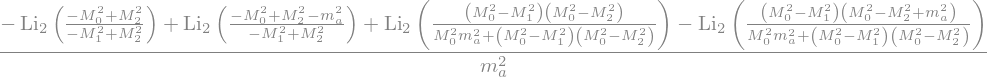

In [137]:
(C0.subs(si).subs(ai)-C0exp).simplify()